<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/Transfer_Learning_02_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Exercise 2 (Fine-tuning)

In [5]:
import tensorflow as tf

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
import zipfile
zip_dir = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_dir.extractall()
zip_dir.close()

--2024-05-02 08:52:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   175MB/s    in 0.9s    

2024-05-02 08:52:59 (175 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [7]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [8]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=(224, 224),
                                                                 label_mode='categorical',
                                                                 shuffle=True)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=(224, 224),
                                                                label_mode='categorical',
                                                                shuffle=True)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model_checkpoints/checkpoints.ckpt',
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      save_freq='epoch')

In [10]:
Base_model = tf.keras.applications.EfficientNetB0(include_top=False)

Base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='Input_layer')

x = Base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

16705208/16705208 [==============================] - 0s 0us/step


In [11]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data,
                    callbacks=[model_checkpoint])

Epoch 1/10
24/24 [==============================] - 23s 545ms/step - loss: 1.9057 - accuracy: 0.4000 - val_loss: 1.3490 - val_accuracy: 0.7108
Epoch 2/10
24/24 [==============================] - 7s 300ms/step - loss: 1.0992 - accuracy: 0.7773 - val_loss: 0.8887 - val_accuracy: 0.8164
Epoch 3/10
24/24 [==============================] - 8s 346ms/step - loss: 0.7870 - accuracy: 0.8280 - val_loss: 0.7135 - val_accuracy: 0.8404
Epoch 4/10
24/24 [==============================] - 13s 524ms/step - loss: 0.6276 - accuracy: 0.8653 - val_loss: 0.6193 - val_accuracy: 0.8488
Epoch 5/10
24/24 [==============================] - 8s 328ms/step - loss: 0.5438 - accuracy: 0.8867 - val_loss: 0.5611 - val_accuracy: 0.8604
Epoch 6/10
24/24 [==============================] - 7s 300ms/step - loss: 0.4770 - accuracy: 0.8893 - val_loss: 0.5253 - val_accuracy: 0.8628
Epoch 7/10
24/24 [==============================] - 8s 325ms/step - loss: 0.4249 - accuracy: 0.9120 - val_loss: 0.4968 - val_accuracy: 0.8656
Epoc

In [12]:
import matplotlib.pyplot as plt
def plot_hist_curve(hist):
  """
  takes history as an parameter and plots the loss curves and accuracy curves
  """
  loss = hist.history['loss']
  accuracy = hist.history['accuracy']

  val_loss = hist.history['val_loss']
  val_accuracy = hist.history['val_accuracy']

  plt.plot(loss, label='loss')
  plt.plot(val_loss, label='val_loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('loss_curve')
  plt.legend()
  plt.figure()

  plt.plot(accuracy, label='accuracy')
  plt.plot(val_accuracy, label='val_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.title('accuracy_curve')
  plt.legend()

In [13]:
model.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.4452 - accuracy: 0.8724


[0.4451780617237091, 0.8723999857902527]

In [14]:
model.load_weights('model_checkpoints/checkpoints.ckpt')
model.evaluate(test_data)

79/79 [==============================] - 6s 65ms/step - loss: 0.4452 - accuracy: 0.8724


[0.4451781213283539, 0.8723999857902527]

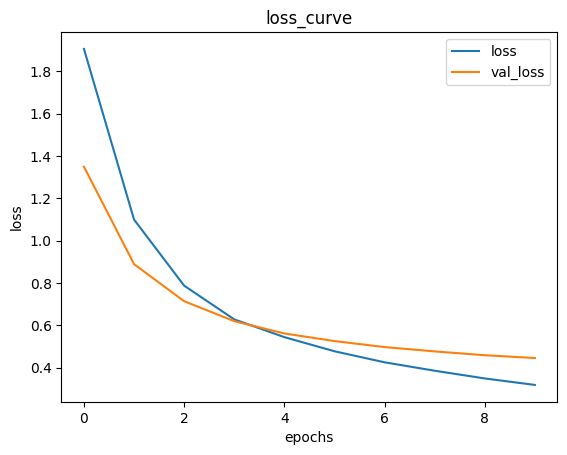

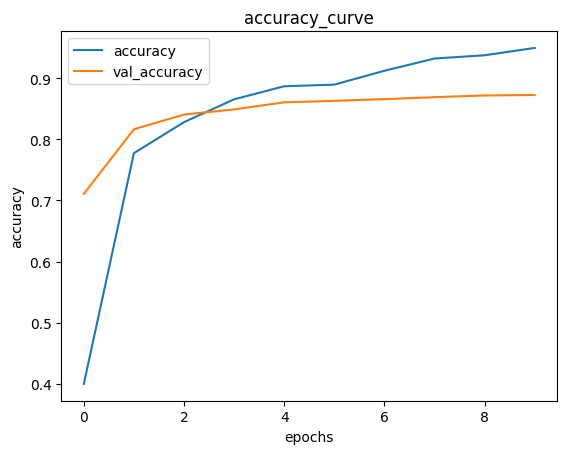

In [15]:
plot_hist_curve(history)

###Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [17]:
Base_model.layers

In [18]:
Base_model.trainable=True

for layer in Base_model.layers[:-20]:
  layer.trainable = False

In [19]:
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable)

input_1 False
rescaling False
normalization False
rescaling_1 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_proj

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [21]:
history_2 = model.fit(train_data,
                      epochs=20,
                      validation_data=test_data,
                      initial_epoch=history.epoch[-1]
                      )

Epoch 10/20
24/24 [==============================] - 20s 420ms/step - loss: 0.7519 - accuracy: 0.8240 - val_loss: 0.4175 - val_accuracy: 0.8736
Epoch 11/20
24/24 [==============================] - 8s 308ms/step - loss: 0.4873 - accuracy: 0.9213 - val_loss: 0.4119 - val_accuracy: 0.8736
Epoch 12/20
24/24 [==============================] - 7s 294ms/step - loss: 0.3755 - accuracy: 0.9440 - val_loss: 0.4012 - val_accuracy: 0.8764
Epoch 13/20
24/24 [==============================] - 8s 319ms/step - loss: 0.2955 - accuracy: 0.9533 - val_loss: 0.3925 - val_accuracy: 0.8792
Epoch 14/20
24/24 [==============================] - 8s 334ms/step - loss: 0.2292 - accuracy: 0.9653 - val_loss: 0.3885 - val_accuracy: 0.8796
Epoch 15/20
24/24 [==============================] - 7s 292ms/step - loss: 0.1847 - accuracy: 0.9800 - val_loss: 0.3797 - val_accuracy: 0.8816
Epoch 16/20
24/24 [==============================] - 7s 295ms/step - loss: 0.1626 - accuracy: 0.9853 - val_loss: 0.3728 - val_accuracy: 0.884

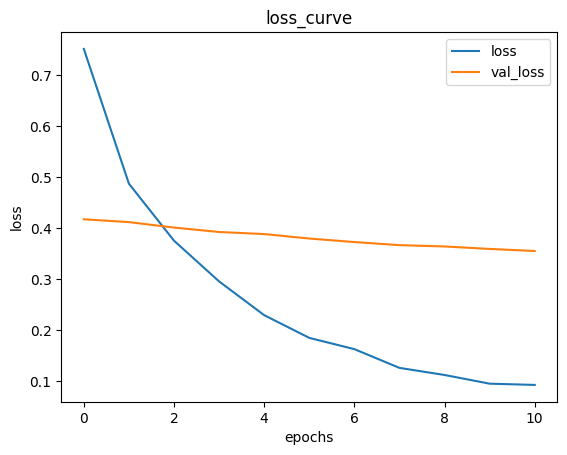

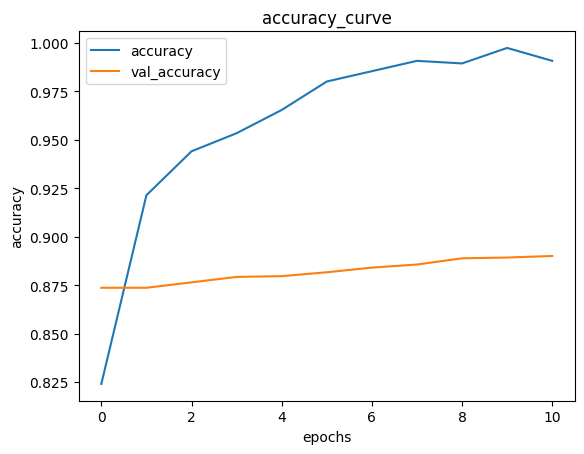

In [22]:
plot_hist_curve(history_2)

###Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs

In [23]:
Base_model.trainable=True

for layer in Base_model.layers[:-30]:
  layer.trainable = False

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.00001),
              metrics=['accuracy'])

In [25]:
history_3 = model.fit(train_data,
                      epochs=30,
                      validation_data=test_data,
                      initial_epoch=history_2.epoch[-1])

Epoch 20/30
24/24 [==============================] - 19s 360ms/step - loss: 0.1225 - accuracy: 0.9853 - val_loss: 0.3537 - val_accuracy: 0.8916
Epoch 21/30
24/24 [==============================] - 8s 326ms/step - loss: 0.0928 - accuracy: 0.9973 - val_loss: 0.3573 - val_accuracy: 0.8880
Epoch 22/30
24/24 [==============================] - 8s 337ms/step - loss: 0.1009 - accuracy: 0.9907 - val_loss: 0.3612 - val_accuracy: 0.8868
Epoch 23/30
24/24 [==============================] - 8s 326ms/step - loss: 0.1005 - accuracy: 0.9920 - val_loss: 0.3642 - val_accuracy: 0.8860
Epoch 24/30
24/24 [==============================] - 7s 295ms/step - loss: 0.0838 - accuracy: 0.9987 - val_loss: 0.3659 - val_accuracy: 0.8856
Epoch 25/30
24/24 [==============================] - 8s 301ms/step - loss: 0.0900 - accuracy: 0.9973 - val_loss: 0.3671 - val_accuracy: 0.8852
Epoch 26/30
24/24 [==============================] - 8s 330ms/step - loss: 0.0819 - accuracy: 0.9960 - val_loss: 0.3676 - val_accuracy: 0.884

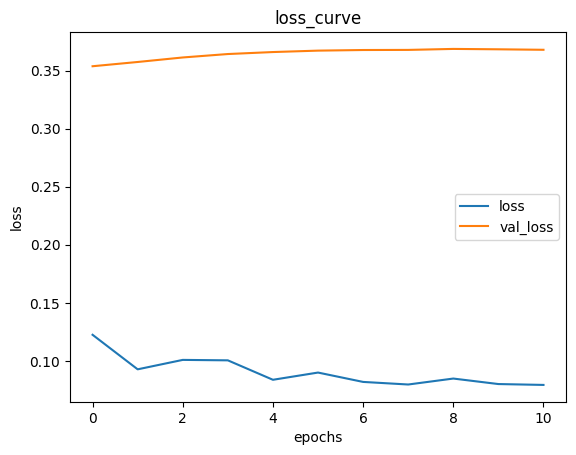

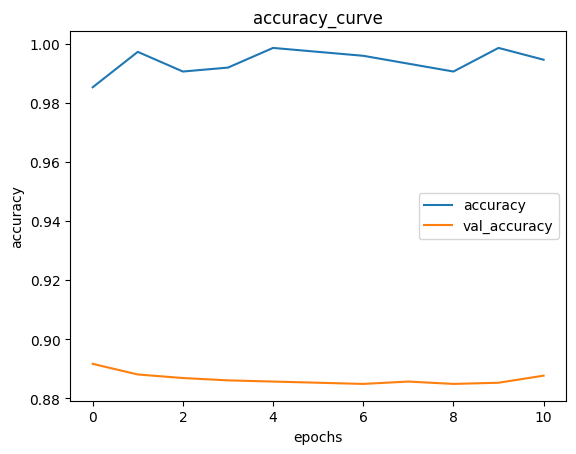

In [26]:
plot_hist_curve(history_3)

###Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [27]:
import pathlib

path = pathlib.Path('/content/10_food_classes_10_percent/test')
class_names = sorted(item.name for item in path.glob('*'))

In [45]:
import random
import os
import cv2

def pred_visualize(main_folder, sub_folder):
  """
  Predicts the class of random image in the given folders and visualize the image
  1. main_folder - takes the main folder of the images
  2. sub_folder - where all class images are there (folder)
  """
  target_class = random.choice(class_names)
  target_dir = main_folder+'/'+sub_folder+"/"+target_class
  target_image = random.choice(os.listdir(target_dir))
  random_image_path = target_dir +'/'+ target_image
  image = cv2.imread(random_image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))

  predicted = model.predict(tf.expand_dims(image, axis=0))
  pre_class = class_names[tf.argmax(tf.squeeze(predicted))]

  plt.imshow(image)
  plt.title(f"Predicted: {pre_class}")
  plt.axis(False)

1/1 [==============================] - 0s 27ms/step


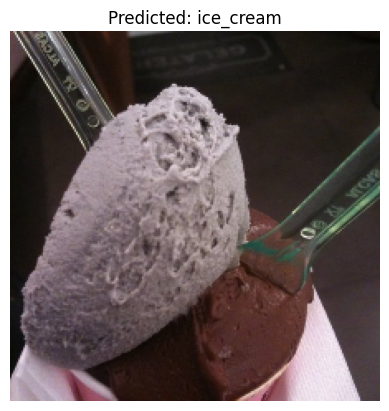

In [54]:
main_fold = '/content/10_food_classes_10_percent'
sub_fold = 'test'
pred_visualize(main_fold, sub_fold)